# PUMP FULL DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [2]:
zero = pd.read_csv('datasets/pump/0_dB_pump_filepath_features_and_std.csv')
six = pd.read_csv('datasets/pump/6_dB_pump_filepath_features_and_std.csv')
neg = pd.read_csv('datasets/pump/-6_dB_pump_filepath_features_and_std.csv')

In [3]:
d = six.append(zero)
df = d.append(neg)

In [4]:
df.to_csv('datasets/pump/pump_full_features_with_std.csv')

In [5]:
df.shape

(12615, 75)

In [6]:
df.columns

Index(['Type of SNR', 'Type of Machine', 'Model Number', 'Status', 'File Name',
       'y', 'SR', 'y mean', 'y max', 'y min', 'chroma_stft min',
       'chroma_stft mean', 'chroma_stft max', 'chroma_cqt min',
       'chroma_cqt mean', 'chroma_cqt max', 'chroma_cens min',
       'chroma_cens mean', 'chroma_cens max', 'melspectogram min',
       'melspectogram mean', 'melspectogram max', 'mfcc min', 'mfcc mean',
       'mfcc max', 'rms min', 'rms mean', 'rms max', 'spectral_centroid min',
       'spectral_centroid mean', 'spectral_centroid max', 'spec_bw min',
       'spec_bw mean', 'spec_bw max', 'spec_contrast min',
       'spec_contrast mean', 'spec_contrast max', 'flatness min',
       'flatness mean', 'flatness max', 'rolloff min', 'rolloff mean',
       'rolloff max', 'poly_0 min', 'poly_0 mean', 'poly_0 max', 'poly_1 min',
       'poly_1 mean', 'poly_1 max', 'poly_2 min', 'poly_2 mean', 'poly_2 max',
       'tonnetz min', 'tonnetz mean', 'tonnetz max', 'zero_crossing_rate min',
  

In [7]:
df1 = df[[ 'y mean', 'y max', 'y min', 'chroma_stft min',
       'chroma_stft mean', 'chroma_stft max', 'chroma_cqt min',
       'chroma_cqt mean', 'chroma_cqt max', 'chroma_cens min',
       'chroma_cens mean', 'chroma_cens max', 'melspectogram min',
       'melspectogram mean', 'melspectogram max', 'mfcc min', 'mfcc mean',
       'mfcc max', 'rms min', 'rms mean', 'rms max', 'spectral_centroid min',
       'spectral_centroid mean', 'spectral_centroid max', 'spec_bw min',
       'spec_bw mean', 'spec_bw max', 'spec_contrast min',
       'spec_contrast mean', 'spec_contrast max', 'flatness min',
       'flatness mean', 'flatness max', 'rolloff min', 'rolloff mean',
       'rolloff max', 'poly_0 min', 'poly_0 mean', 'poly_0 max', 'poly_1 min',
       'poly_1 mean', 'poly_1 max', 'poly_2 min', 'poly_2 mean', 'poly_2 max',
       'tonnetz min', 'tonnetz mean', 'tonnetz max', 'zero_crossing_rate min',
       'zero_crossing_rate mean', 'zero_crossing_rate max', 'y std',
       'chroma_stft std', 'chroma_cqt std', 'chroma_cens std',
       'melspectogram std', 'mfcc std', 'rms std', 'spectral_centroid std',
       'spec_bw std', 'spec_contrast std', 'flatness std', 'rolloff std',
       'poly_0 std', 'poly_1 std', 'poly_2 std', 'tonnetz std',
       'zero_crossing_rate std']].copy()

In [8]:
df['Status'].replace({'abnormal' : 1, 'normal' : 0}, inplace=True)

In [9]:
df['Status'].value_counts()

0    11247
1     1368
Name: Status, dtype: int64

In [10]:
X = df1.values
y = df['Status'].values
X.shape, y.shape

((12615, 68), (12615,))

#### DIVIDE THE MODEL INTO MODEL AND VALIDATION SET

In [11]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

### DIVIDE THE MODEL INTO TRAIN AND TEST

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

In [13]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9619584360690384

In [14]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2554
           1       0.98      0.64      0.77       285

    accuracy                           0.96      2839
   macro avg       0.97      0.82      0.87      2839
weighted avg       0.96      0.96      0.96      2839



y max
y min
rms max
spec_bw max
poly_0 max
poly_1 min
poly_1 max
poly_2 max
y std
melspectogram std
mfcc std
spec_bw std
rolloff std
poly_1 std


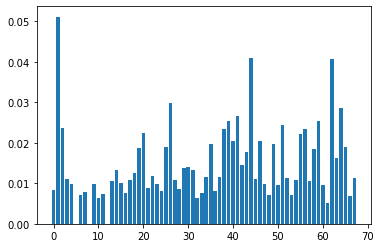

In [16]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        #print(f'Feature: {df1.columns[i]}, Score: {v:.5f}')
        print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### DO SMOTE

In [17]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [18]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9580838323353293

In [19]:
y_test_pred = rf.predict(X_test)

In [20]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2499,64
1,55,221


In [21]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2554
           1       0.80      0.78      0.79       285

    accuracy                           0.96      2839
   macro avg       0.89      0.88      0.88      2839
weighted avg       0.96      0.96      0.96      2839



In [22]:
filename = 'datasets/models/pump_models/pump_ALLft_resample.sav'
pickle.dump(rf, open(filename, 'wb'))


### LESSER COLUMNS

In [23]:
les = df[['y max', 'y min', 'rms max', 'spec_bw max', 'poly_0 max',
          'poly_1 min', 'poly_1 max', 'poly_2 max', 'y std', 
          'melspectogram std', 'mfcc std', 'spec_bw std', 
          'rolloff std', 'poly_1 std']].copy()

In [24]:
X = les.values
y = df['Status'].values
X.shape, y.shape

((12615, 14), (12615,))

In [25]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

In [27]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9538569918985559

In [28]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [29]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9306093694963015

In [30]:
y_test_pred = rf.predict(X_test)

In [31]:
validation_test = rf.predict(X_validate)

In [32]:
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1054,40
1,66,102


In [33]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2420,63
1,134,222


In [34]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2554
           1       0.62      0.78      0.69       285

    accuracy                           0.93      2839
   macro avg       0.80      0.86      0.83      2839
weighted avg       0.94      0.93      0.93      2839



In [35]:
filename = 'datasets/models/pump_models/pump_14ft_resample.sav'
pickle.dump(rf, open(filename, 'wb'))

### ANOTHER LESSER COLUMNS

y max
y min
rms max
spec_bw max
poly_0 max
poly_1 min
poly_1 max
poly_2 max
y std
melspectogram std
mfcc std
spec_bw std
rolloff std
poly_1 std


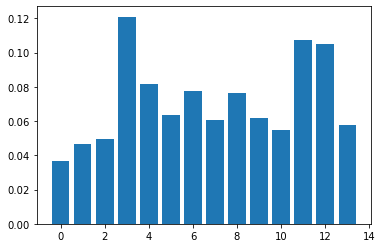

In [39]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        #print(f'Feature: {df1.columns[i]}, Score: {v:.5f}')
        print(les.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [54]:
test3 = df[['spec_bw max', 'poly_0 max',
          'poly_1 min', 'poly_1 max', 'poly_2 max', 'y std', 
          'melspectogram std', 'spec_bw std', 
          'rolloff std', 'poly_1 std']].copy()

In [55]:
X = test3.values
y = df['Status'].values
X.shape, y.shape

((12615, 10), (12615,))

In [56]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

In [58]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9545614653046848

In [59]:
filename = 'datasets/models/pump_models/pump_rf_10cols.sav'
pickle.dump(rf, open(filename, 'wb'))

In [60]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [61]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9246213455442057

In [62]:
y_test_pred = rf.predict(X_test)

In [63]:
validation_test = rf.predict(X_validate)

In [64]:
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1049,42
1,71,100


In [65]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2394,54
1,160,231


In [66]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2554
           1       0.59      0.81      0.68       285

    accuracy                           0.92      2839
   macro avg       0.78      0.87      0.82      2839
weighted avg       0.94      0.92      0.93      2839



In [67]:
print(classification_report(y_validate,validation_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1120
           1       0.58      0.70      0.64       142

    accuracy                           0.91      1262
   macro avg       0.77      0.82      0.79      1262
weighted avg       0.92      0.91      0.91      1262



Feature: spec_bw max, Score: 0.13846
Feature: poly_0 max, Score: 0.08196
Feature: poly_1 min, Score: 0.06827
Feature: poly_1 max, Score: 0.09158
Feature: poly_2 max, Score: 0.09715
Feature: y std, Score: 0.11483
Feature: melspectogram std, Score: 0.08587
Feature: spec_bw std, Score: 0.12902
Feature: rolloff std, Score: 0.11356
Feature: poly_1 std, Score: 0.07930


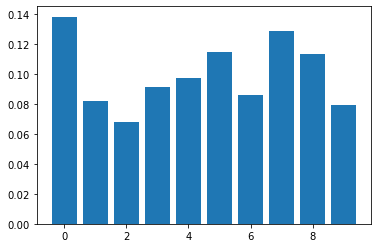

In [68]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        print(f'Feature: {test3.columns[i]}, Score: {v:.5f}')
        #print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
 y max,
Feature: rms max,
Feature: spec_contrast max, Score: 0.11516
Feature: rolloff max, Score: 0.13249
Feature: poly_0 max, Score: 0.13106
Feature: poly_1 max, Score: 0.08942
Feature: rms std, Score: 0.10088
Feature: poly_0 std

In [77]:
test4 = df[['chroma_stft mean', 'chroma_cqt mean', 'melspectogram mean',  'rms mean', 'poly_0 mean',
            'poly_1 mean', 'poly_2 mean', 'tonnetz mean']]
X = test4.values
y = df['Status'].values
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)

rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9367493995196157

In [80]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [81]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9322124366159594

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

validation_test = rf.predict(X_validate)
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

y_test_pred = rf.predict(X_test)
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

print(classification_report(y_validate,validation_test))
print(classification_report(y_test,y_test_pred))

In [82]:
validation_test = rf.predict(X_validate)

In [83]:
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1160,53
1,73,379


In [84]:
y_test_pred = rf.predict(X_test)
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2617,120
1,134,876


In [85]:
print(classification_report(y_validate,validation_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1233
           1       0.84      0.88      0.86       432

    accuracy                           0.92      1665
   macro avg       0.90      0.91      0.90      1665
weighted avg       0.93      0.92      0.92      1665



In [86]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2751
           1       0.87      0.88      0.87       996

    accuracy                           0.93      3747
   macro avg       0.91      0.92      0.91      3747
weighted avg       0.93      0.93      0.93      3747



Feature: chroma_stft mean, Score: 0.15094
Feature: melspectogram mean, Score: 0.09972
Feature: mfcc mean, Score: 0.13189
Feature: rms mean, Score: 0.13804
Feature: rolloff min, Score: 0.11952
Feature: poly_0 mean, Score: 0.12358
Feature: poly_1 mean, Score: 0.11934
Feature: poly_2 mean, Score: 0.11696


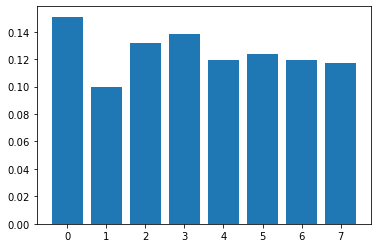

In [88]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        print(f'Feature: {test3.columns[i]}, Score: {v:.5f}')
        #print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
4,RandomForestClassifier,93.89%
3,DecisionTreeClassifier,90.42%
0,KNeighborsClassifier,88.66%
5,AdaBoostClassifier,85.13%
7,QuadraticDiscriminantAnalysis,78.97%
2,SVC RBF kernel,77.93%
1,SVC,73.42%
6,GaussianNB,72.64%


### TRYING WITH ONLY THE MEAN AND STDs

In [90]:
stds = df[['y mean', 
       'chroma_stft mean', 
       'chroma_cqt mean', 
       'chroma_cens mean', 
       'melspectogram mean',  'mfcc mean',
       'rms mean', 
       'spectral_centroid mean', 
       'spec_bw mean', 
       'spec_contrast mean', 
       'flatness mean',  'rolloff mean',
       'poly_0 mean', 
       'poly_1 mean', 'poly_2 mean', 
       'tonnetz mean', 
       'zero_crossing_rate mean',  'y std',
       'chroma_stft std', 'chroma_cqt std', 'chroma_cens std',
       'melspectogram std', 'mfcc std', 'rms std', 'spectral_centroid std',
       'spec_bw std', 'spec_contrast std', 'flatness std', 'rolloff std',
       'poly_0 std', 'poly_1 std', 'poly_2 std', 'tonnetz std',
       'zero_crossing_rate std']].copy()

In [91]:
X = stds.values
y = df['Status'].values
X.shape, y.shape

((16650, 34), (16650,))

In [92]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25,random_state = 40)
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.9420870029356819

In [94]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [95]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)


0.9468908460101414

In [96]:
validation_test = rf.predict(X_validate)
pd.crosstab(pd.Series(validation_test, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1188,37
1,45,395


In [98]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2751
           1       0.89      0.91      0.90       996

    accuracy                           0.95      3747
   macro avg       0.93      0.93      0.93      3747
weighted avg       0.95      0.95      0.95      3747



In [97]:
y_test_pred = rf.predict(X_test)
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,2643,91
1,108,905


In [99]:
print(classification_report(y_validate,validation_test))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1233
           1       0.90      0.91      0.91       432

    accuracy                           0.95      1665
   macro avg       0.93      0.94      0.94      1665
weighted avg       0.95      0.95      0.95      1665



Feature: chroma_stft mean, Score: 0.04480
Feature: melspectogram mean, Score: 0.05154
Feature: rms mean, Score: 0.04849
Feature: tonnetz mean, Score: 0.04225
Feature: y std, Score: 0.04915
Feature: melspectogram std, Score: 0.06210
Feature: poly_1 std, Score: 0.04251


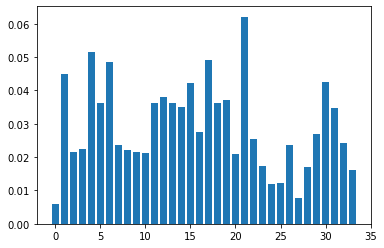

In [104]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.04:
        print(f'Feature: {stds.columns[i]}, Score: {v:.5f}')
        #print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()